# let's import necessary module.

In [1]:
import numpy as np #  To generate the arrays.
import matplotlib.pyplot as plt  # To plot the response and result.

#  Set the condition for multi-arm-bandit-algorithm

In [2]:
num_arms = 10  # choose how many arms
num_steps = 2000  # number of steps to play in each simulation
simulation = 2000 # number of times for simulation for average out
epsilons = [0.1,0.01,0]  # greedy-ness index, in order to have exploration and exploitation

# generate avg_reward and optimal action counts to document exploration and exploitation

In [3]:
avg_rewards = np.zeros((len(epsilons), num_steps))  # create 2d array
optimal_action_counts = np.zeros((len(epsilons), num_steps)) #create 2d array

# Bandit Algorithm Implementation- defining the logic and prepare the simulation environment.

In [4]:
def unique_val(num_arms, distribution_func, *args):
    """This function generates unique values for each arm using the specified distribution function and parameters."""
    values = np.zeros(num_arms)
    for i in range(num_arms):
        unique = False
        while not unique:
            value = distribution_func(*args)
            if value not in values[:i]:
                values[i] = value
                unique = True
    return values

def multi_arm_bandit(num_arms, num_steps, epsilon, simulation):
  """This function takes four paramters and loop through each epsilon for every arm and finds the finds the average rewards and optimal action."""
  cum_rewards = np.zeros(num_steps)
  cum_optimal_action = np.zeros(num_steps)

  for simu in range(simulation):
      # Ensure unique means and standard deviations for each arm
      true_action_values = unique_val(num_arms, np.random.normal, 0, 1)  # Generate true strength (mean reward) of each arm from a normal distribution
      reward_std_devs = unique_val(num_arms, np.random.uniform, 0.5, 1.5)   # Generate unique standard deviation for each arm's reward distribution
      optimal_arm = np.argmax(true_action_values)

      arm_counts = np.zeros(num_arms)  # Initialize arm counts
      est_action_values = np.zeros(num_arms)  # Initialize estimate counts

      for step in range(num_steps):
          if np.random.rand() < epsilon:
              action = np.random.choice(num_arms)  # Exploration
          else:
              action = np.argmax(est_action_values)  # Exploitation

          # Generate reward using arm-specific mean and standard deviation
          reward = np.random.normal(true_action_values[action], reward_std_devs[action])
          arm_counts[action] += 1

          # Update estimated action value
          est_action_values[action] += (reward - est_action_values[action]) / arm_counts[action]

          # Update cumulative rewards and optimal action counts
          cum_rewards[step] += reward
          if action == optimal_arm:
              cum_optimal_action[step] += 1

  avg_rewards = cum_rewards / simulation
  percent_optimal_action = cum_optimal_action / simulation * 100

  return avg_rewards, percent_optimal_action


# let's Run the n_arm bandit for different epsilon values, and store the avg_reward and count optimal action

In [5]:
for i, epsilon in enumerate(epsilons): # for ith epsilon storing the avg_rewards, for every arm through the steps
  avg_rewards[i], optimal_action_counts[i] = multi_arm_bandit(num_arms,num_steps, epsilon, simulation)

# Let's plot the results and visualise using the curve
1. Average Reward vs Steps
2. Percentage Optimal Action vs Steps

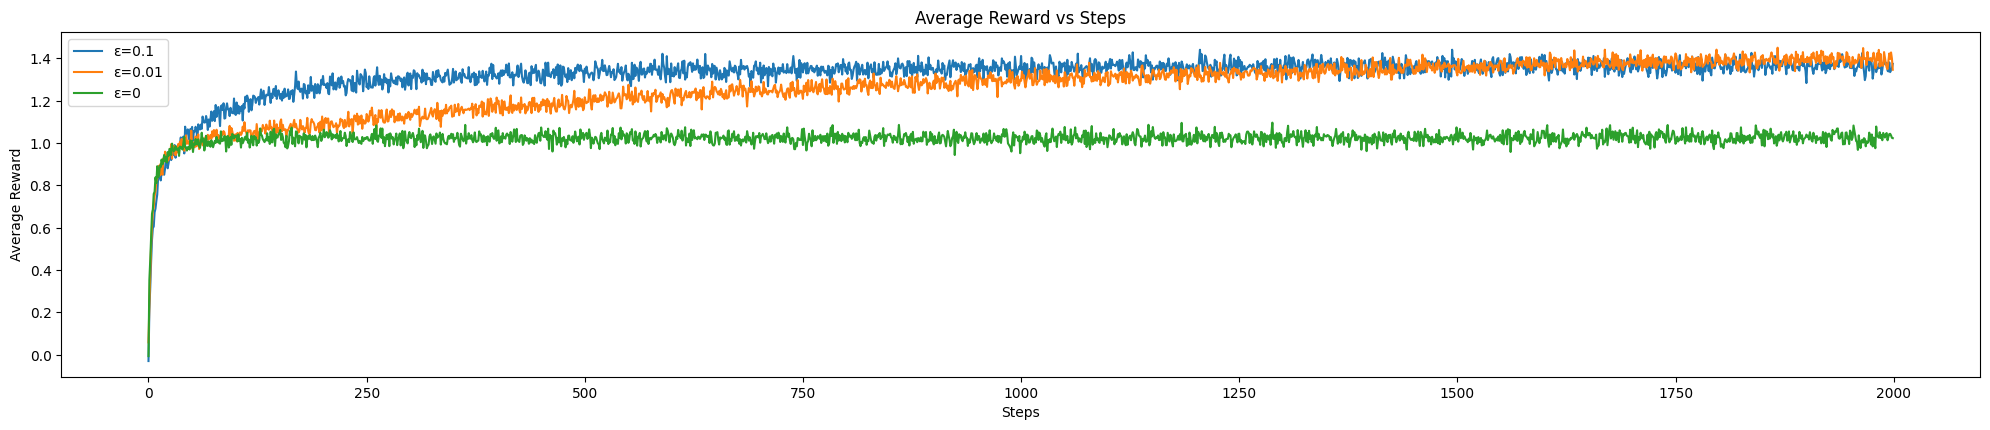

In [6]:
plt.figure(figsize=(20,8)) #  to fit the size of the figure
plt.subplot(2,1,1)
for i, epsilon in enumerate(epsilons):  # looping through the epsilon, for every arm through the steps
  plt.plot(avg_rewards[i], label =f'ε={epsilon}')  # using plot method to plot the reward
plt.xlabel('Steps')  # to put label on x axis
plt.ylabel('Average Reward')  # to put label on y-axis
plt.title('Average Reward vs Steps')  # for title
plt.tight_layout()
plt.legend()  # to add legend for all epsilon
plt.show()

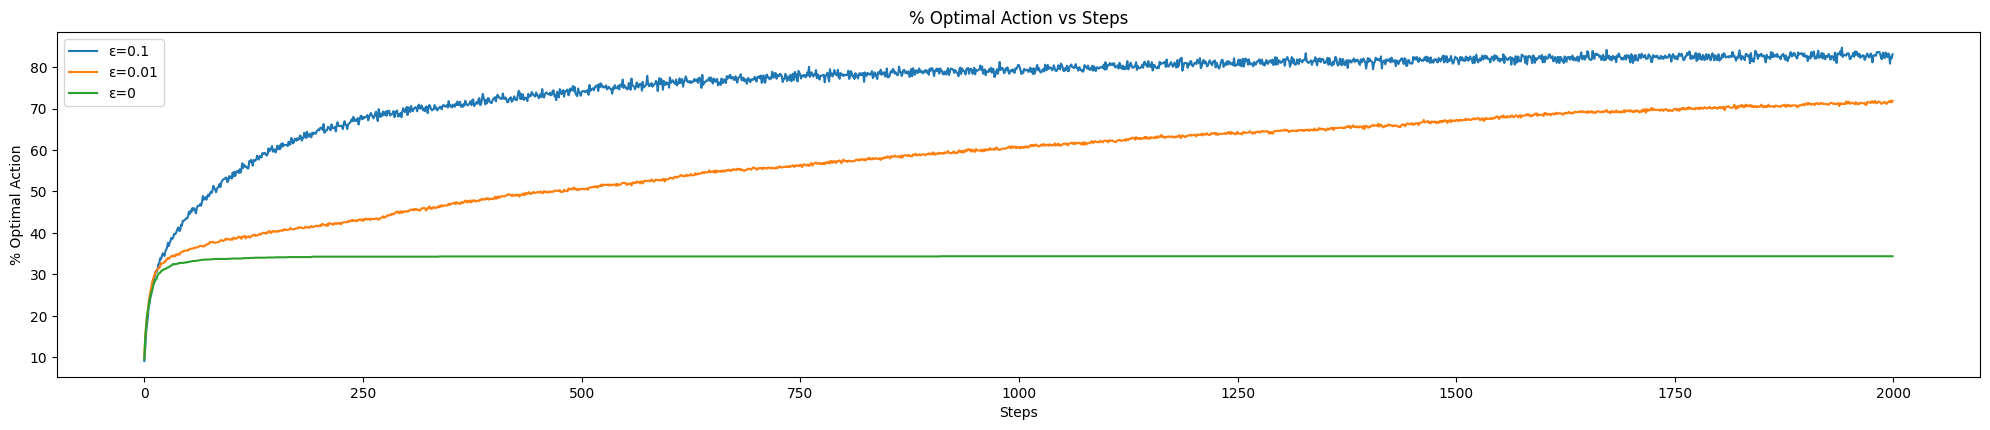

In [7]:
plt.figure(figsize=(20,8))  # to fit the size of the figure
plt.subplot(2, 1, 2)
for i, epsilon in enumerate(epsilons):  # looping through the epsilon, for every arm through the steps
    plt.plot(optimal_action_counts[i], label=f'ε={epsilon}')  # using plot method to plot the reward
plt.xlabel('Steps')  # to put label on x axis
plt.ylabel('% Optimal Action')  # to put label on y-axis
plt.title('% Optimal Action vs Steps')  # for title
plt.tight_layout()
plt.legend()  # to add legend for all epsilon
plt.show()